Arewa Data Science Academy

Deep Learning Cohort2.0

Name: Abdulkadir Shehu Bichi

Email: abdulkadirshehubichi@gmail.com

Title: Week 4 Solution

Exercises Solution


1. Three Areas in Industry Where Computer Vision Is Used


*   Healthcare: For detecting diseases in medical images like X-rays, MRIs, and CT scans.
*   Autonomous Vehicles: Self-driving cars use computer vision to detect lanes, traffic signs, and obstacles.

*   Retail: Automated checkout systems and customer behavior tracking in stores.

2. What Is Overfitting in Machine Learning?
Overfitting is when a machine learning model learns the training data too well, including its noise and outliers, leading to poor generalization on new data.
3. Ways to Prevent Overfitting


*  Dropout: Randomly drops neurons during training to prevent co-adaptation and forces the model to learn robust features.
*  Data Augmentation: Expands training data with transformed versions of existing data (e.g., rotated or flipped images).

* Early Stopping: Monitors validation loss and stops training when performance degrades to avoid overfitting.








In [1]:
 # 5. Load the torchvision.datasets.MNIST() train and test datasets.
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

# Transform for MNIST and FashionMNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST datasets
train_mnist = datasets.MNIST(root=".", train=True, download=True, transform=transform)
test_mnist = datasets.MNIST(root=".", train=False, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:00<00:00, 57.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.88MB/s]


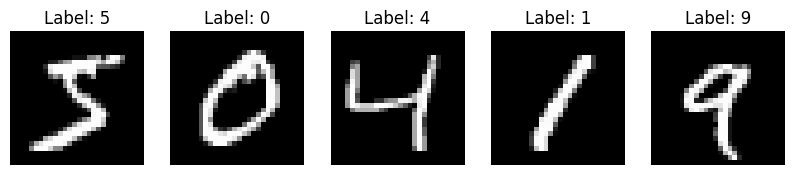

In [2]:
# 6. Visualize at least 5 different samples of the MNIST training dataset.
# Visualize 5 samples
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axs[i].imshow(train_mnist[i][0].squeeze(), cmap='gray')
    axs[i].set_title(f"Label: {train_mnist[i][1]}")
    axs[i].axis("off")
plt.show()

In [4]:
# 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

train_loader = DataLoader(train_mnist, batch_size=32, shuffle=True)
test_loader = DataLoader(test_mnist, batch_size=32)

In [5]:
# 8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.
class TinyVGG(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*7*7, num_classes)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return self.classifier(x)

In [7]:
# Q9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

def train(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)
# Evaluate
def evaluate(model, dataloader, device):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            output = model(X)
            preds.extend(torch.argmax(output, dim=1).cpu())
            labels.extend(y.cpu())
    return preds, labels

# Training on CPU and GPU
device_cpu = "cpu"
device_gpu = "cuda" if torch.cuda.is_available() else "cpu"

for device in [device_cpu, device_gpu]:
    print(f"\nTraining on: {device.upper()}")
    model = TinyVGG().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()
    start = time.time()
    for epoch in range(3):
        loss = train(model, train_loader, loss_fn, optimizer, device)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    end = time.time()
    print(f"Time taken: {end - start:.2f} seconds")


Training on: CPU
Epoch 1, Loss: 0.0958
Epoch 2, Loss: 0.0361
Epoch 3, Loss: 0.0248
Time taken: 1760.06 seconds

Training on: CPU
Epoch 1, Loss: 0.0976
Epoch 2, Loss: 0.0351
Epoch 3, Loss: 0.0255
Time taken: 1725.79 seconds


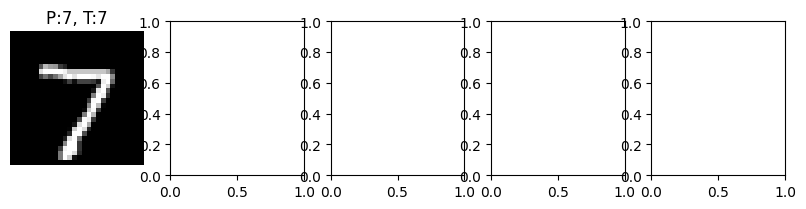

In [13]:
# 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.
# Evaluate
#def evaluate(model, dataloader, device):

    # Predictions and visualization
preds, labels = evaluate(model, test_loader, device)
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
  img, true_label = test_mnist[i]
  pred_label = preds[i]
  axs[i].imshow(img.squeeze(), cmap="gray")
  axs[i].set_title(f"P:{pred_label}, T:{true_label}")
  axs[i].axis("off")
  plt.show()



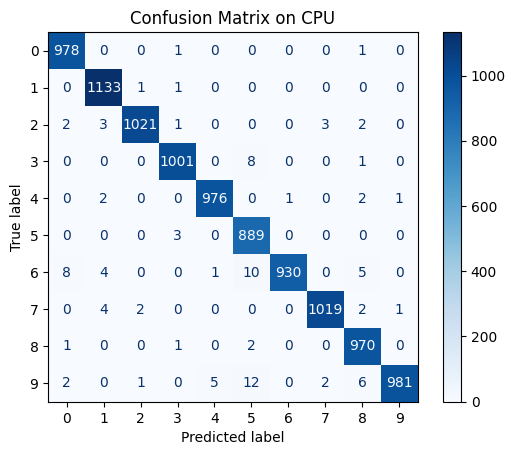

In [14]:
# 11. Plot a confusion matrix comparing your model's predictions to the truth labels.
# Confusion matrix
cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix on {device.upper()}")
plt.show()

In [15]:
# 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?
x = torch.randn(1, 3, 64, 64)

conv_small = nn.Conv2d(3, 16, kernel_size=3)
conv_large = nn.Conv2d(3, 16, kernel_size=9)

print("Output shape (kernel=3):", conv_small(x).shape)
print("Output shape (kernel=9):", conv_large(x).shape)


Output shape (kernel=3): torch.Size([1, 16, 62, 62])
Output shape (kernel=9): torch.Size([1, 16, 56, 56])


100%|██████████| 26.4M/26.4M [00:01<00:00, 15.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 298kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.47MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.0MB/s]


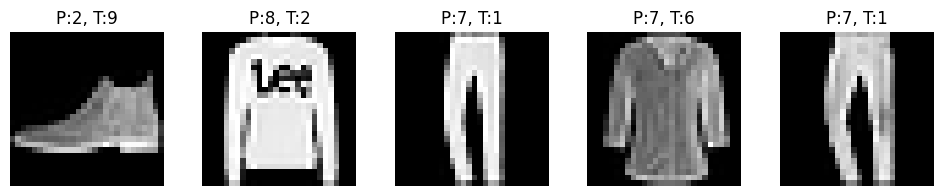

In [16]:
# 13. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
#Then plot some predictions where the model was wrong alongside what the label of the image should've been.
#After visualizing these predictions do you think it's more of a modelling error or a data error?
#As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

# Load FashionMNIST test data
fashion_test = datasets.FashionMNIST(root=".", train=False, download=True, transform=transform)
fashion_loader = DataLoader(fashion_test, batch_size=32)

# Use trained model
model.eval()
wrong_preds = []
with torch.no_grad():
    for X, y in fashion_loader:
        X, y = X.to(device_gpu), y.to(device_gpu)
        preds = torch.argmax(model(X), dim=1)
        for i in range(len(preds)):
            if preds[i] != y[i]:
                wrong_preds.append((X[i].cpu(), preds[i].item(), y[i].item()))
        if len(wrong_preds) >= 5:
            break

# Visualize wrong predictions
fig, axs = plt.subplots(1, 5, figsize=(12, 2))
for i, (img, pred, true) in enumerate(wrong_preds[:5]):
    axs[i].imshow(img.squeeze(), cmap="gray")
    axs[i].set_title(f"P:{pred}, T:{true}")
    axs[i].axis("off")
plt.show()
